In [3]:
#Import libraries and input data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

online_rt = pd.read_csv("C:/Users/tahir/Documents/Python Datasets/Online_Retail.csv", encoding= 'latin1')

In [9]:
online_rt.sort_values(['Description','Quantity'], ascending= True)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
45025,540247,72800B,4 PURPLE FLOCK DINNER CANDLES,1,1/5/11 15:56,2.55,15464.0,United Kingdom
72021,542226,72800B,4 PURPLE FLOCK DINNER CANDLES,1,1/26/11 13:20,2.55,17075.0,United Kingdom
104525,545186,72800B,4 PURPLE FLOCK DINNER CANDLES,1,2/28/11 15:05,2.55,17841.0,United Kingdom
160498,550459,72800B,4 PURPLE FLOCK DINNER CANDLES,1,4/18/11 13:17,2.55,18116.0,United Kingdom
160509,550459,72800B,4 PURPLE FLOCK DINNER CANDLES,1,4/18/11 13:17,2.55,18116.0,United Kingdom
...,...,...,...,...,...,...,...,...
52262,540699,POST,NaN,1000,1/11/11 9:32,0.00,NaN,United Kingdom
136537,547966,DOT,NaN,1000,3/28/11 15:49,0.00,NaN,United Kingdom
82795,543258,84611B,NaN,1287,2/4/11 16:06,0.00,NaN,United Kingdom
74615,542505,79063D,NaN,2560,1/28/11 12:04,0.00,NaN,United Kingdom


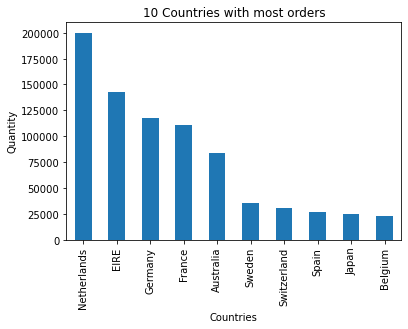

In [16]:
# Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK

# Group by country
countries = online_rt.groupby('Country').sum()

# Sort the value and get the first 10 after UK
countries = countries.sort_values(by = 'Quantity', ascending = False)[1 : 11]

# Create the plot
countries['Quantity'].plot(kind = 'bar')

# Set the titles and labels
plt.xlabel('Countries')
plt.ylabel('Quantity')
plt.title('10 Countries with most orders')

plt.show()



In [17]:
# Exclude negative Quantity entries

online_rt = online_rt[online_rt.Quantity > 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


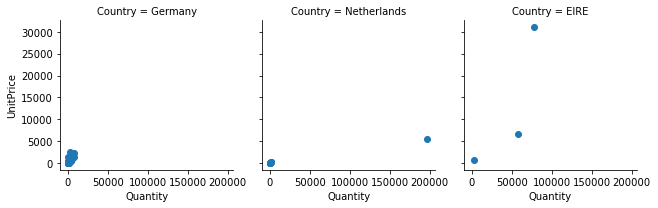

In [42]:
# Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries (except UK)

# Group by Customer ID
customers = online_rt.groupby(['CustomerID','Country']).sum()

# Remove outliers with negative pricing
customers = customers[customers.UnitPrice > 0 ]

# Get the value of the index and put in the column Country
customers['Country'] = customers.index.get_level_values(1)

# Top three countries
top_countries = ['Netherlands','EIRE','Germany']

# Filter the dataframe to just select ones in the top_countries
customers = customers[customers['Country'].isin(top_countries)]


# Create the FaceGrid
g = sns.FacetGrid(customers, col = 'Country')

# Map over the scatterplot
g.map(plt.scatter, "Quantity","UnitPrice", alpha = 1)
g.add_legend()
